In [1]:
import os
base_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
os.chdir(base_dir)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import lane_detection
import utils

%matplotlib inline

In [2]:
image_folder_name = 'test_image'

In [3]:
image_paths = utils.get_list_of_input_files(image_folder_name, "jpg")
images = [cv2.imread(image_path) for image_path in image_paths]

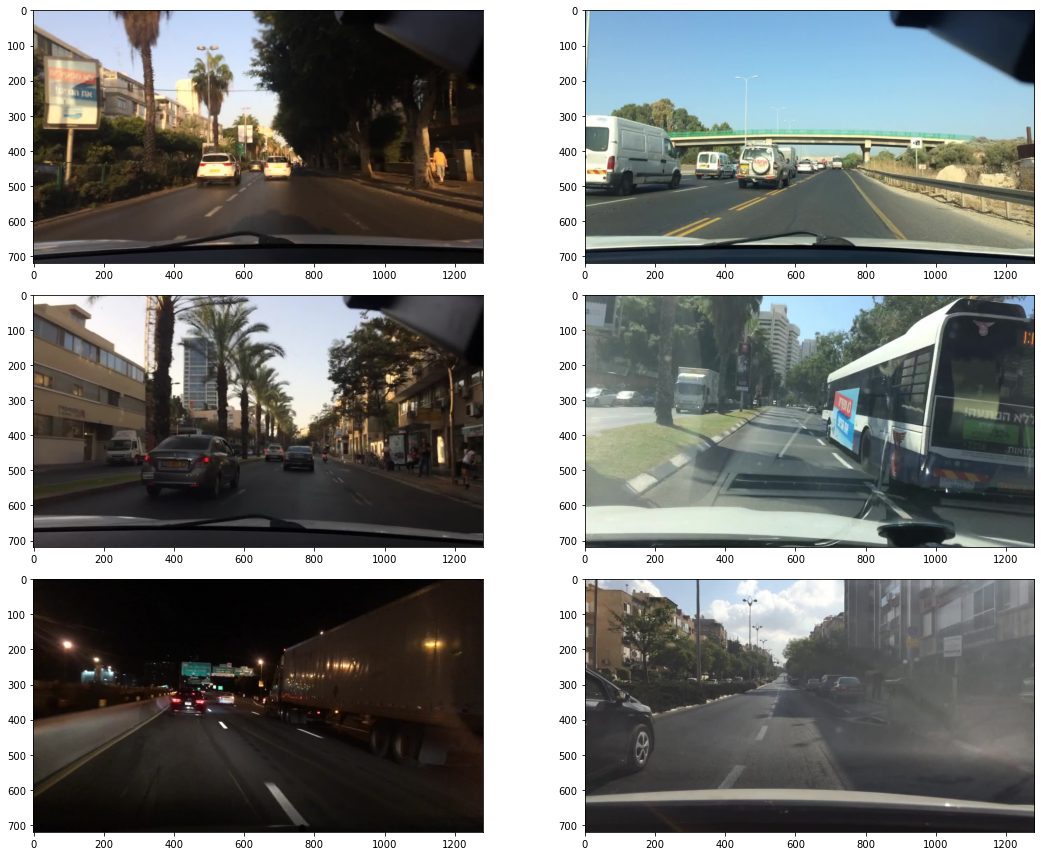

In [4]:
utils.show_images(images, cmap='bgr')

<H3> Create mask to detect white and yellow lanes<H3>

In [5]:
def create_channel_mask(channel, threshold):
    return cv2.inRange(channel, threshold[0], threshold[1])

<H3>BGR - Red channel<H3>

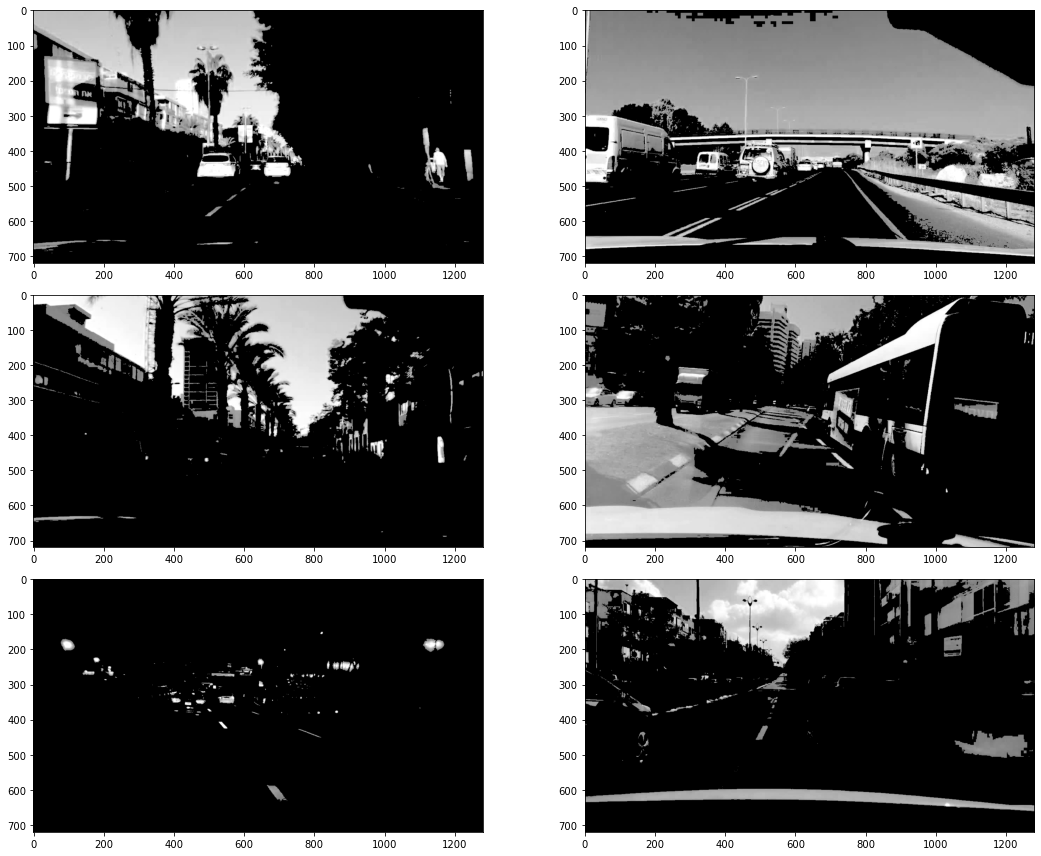

In [6]:
def create_bgr_lane_mask(frame):
    # Select channel red
    mask = create_channel_mask(frame[:, :, 2], (125, 255))
    return cv2.bitwise_and(frame[:, :, 2], frame[:, :, 2], mask=mask)

utils.show_images(list(map(create_bgr_lane_mask, images)))

<H3>HLS - Ligthness<H3>

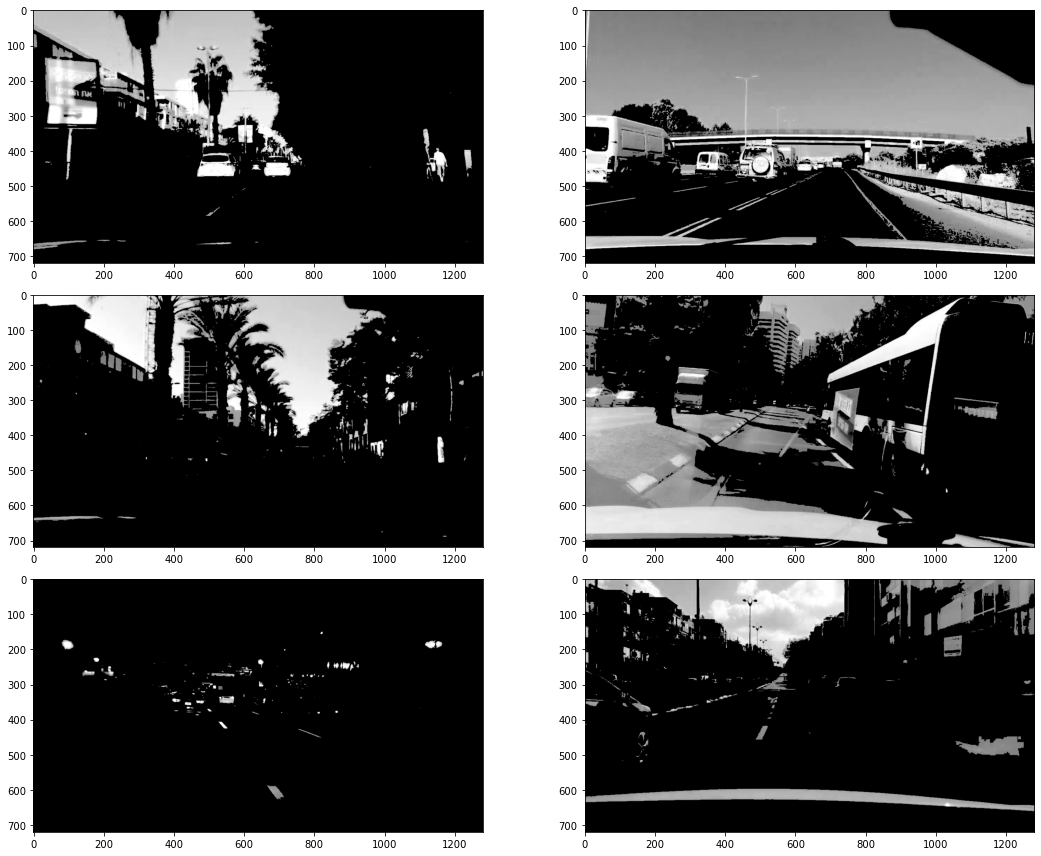

In [11]:
def bgr_to_hls(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2HLS)

def create_hls_lane_mask(frame):
    # Select channel lightness
    hls_frame = bgr_to_hls(frame)
    mask = create_channel_mask(hls_frame[:, :, 1], (125, 255))
    return cv2.bitwise_and(frame[:, :, 2], frame[:, :, 2], mask=mask)

lanes = list(map(create_hls_lane_mask, images))
utils.show_images(lanes)

<H3>HSV - Value<H3>

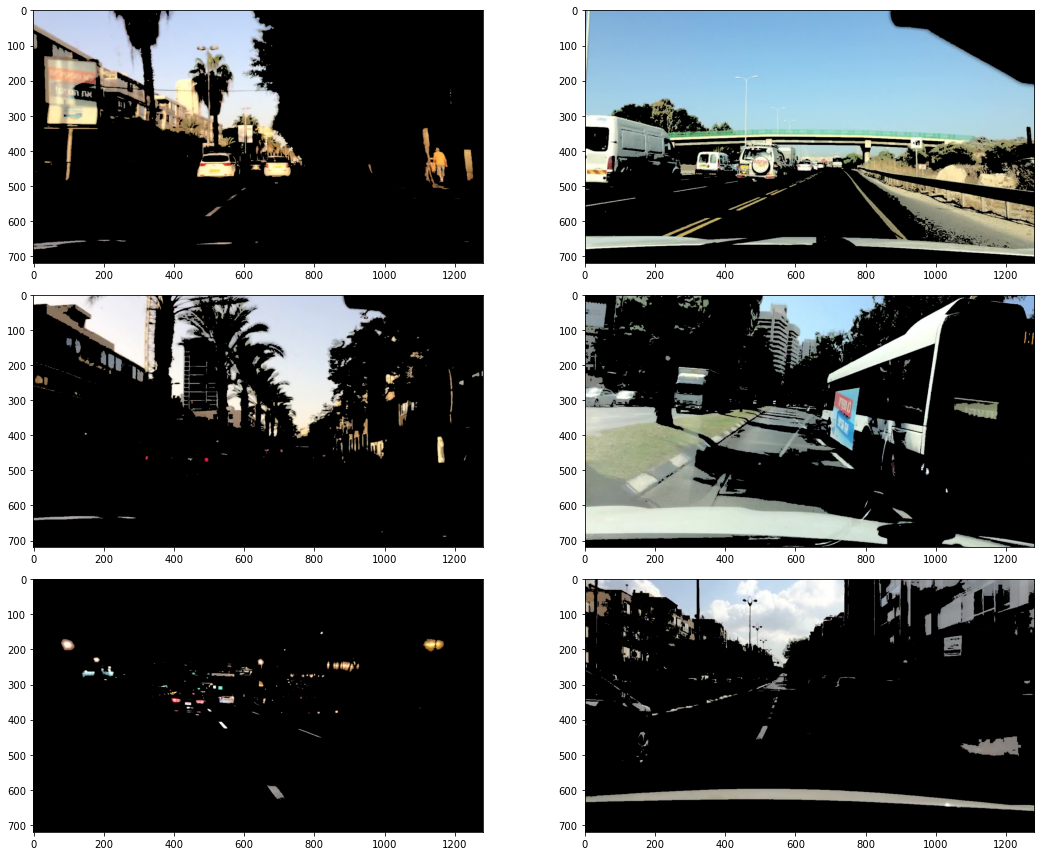

In [9]:
def bgr_to_hsv(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

def create_hsv_lane_mask(frame):
    # Select channel value
    hsv_frame = bgr_to_hsv(frame)
    mask = create_channel_mask(hsv_frame[:, :, 2], (130, 255))
    return cv2.bitwise_and(frame, frame, mask=mask)

utils.show_images(list(map(create_hsv_lane_mask, images)), 'bgr')